In [1]:
import numpy as np
import gym
import matplotlib.pyplot as plt

def get_epsilon_greedy_action(q_values, epsilon, action_n):
    policy = np.ones(action_n) * epsilon / action_n
    max_action = np.argmax(q_values)
    policy[max_action] += 1 - epsilon
    return np.random.choice(np.arange(action_n), p=policy)

In [2]:
%matplotlib notebook

In [3]:
env = gym.make("Taxi-v3")

In [36]:
def MonteCarlo(env, episode_n, trajectory_len=500, gamma=0.99):
    total_rewards = [0]
    episedes_total = [0]
    state_n = env.observation_space.n
    action_n = env.action_space.n
    qfunction_act = np.zeros((state_n, action_n))
    qfunction_fill = np.zeros((state_n, action_n))
    counter = np.zeros((state_n, action_n))
    
    for episode in range(episode_n):
        epsilon = 1 - episode / episode_n
        if(episode>=episode_n*1/2 and episode<=episode_n*4/5):
            epsilon = 0.1
        if(episode>episode_n*5/6):
            epsilon = 0.1
        if(episode>episode_n*7/8):
            epsilon = 0.01
        if(episode>episode_n*10/11):
            epsilon = 0
        if(episode<episode_n*1/2 or episode>episode_n*3/4):
            qfunction_act = qfunction_fill.copy()
        if(episode==episode_n*1/2):
            qfunction_fill =  np.zeros((state_n, action_n))
            counter = np.zeros((state_n, action_n))
        trajectory = {'states': [], 'actions': [], 'rewards': []}
        
        state = env.reset()
        for _ in range(trajectory_len):
            trajectory['states'].append(state)
            
            action = get_epsilon_greedy_action(qfunction_act[state], epsilon, action_n)
            trajectory['actions'].append(action)
            
            state, reward, done, _ = env.step(action)
            trajectory['rewards'].append(reward)
            
            if done:
                break
        
        real_trajectory_len = len(trajectory['rewards'])
        
        total_rewards.append(sum(trajectory['rewards']))
        episedes_total.append(episedes_total[-1]+real_trajectory_len)
        if(episode%100==0):
            print(episode/episode_n,total_rewards[-1])
        returns = np.zeros(real_trajectory_len + 1)
        for t in range(real_trajectory_len - 1, -1, -1):
            returns[t] = trajectory['rewards'][t] + gamma * returns[t + 1]
        for t in range(real_trajectory_len):
            state = trajectory['states'][t]
            action = trajectory['actions'][t]
            qfunction_fill[state][action] += (returns[t] - qfunction_fill[state][action]) / (1 + counter[state][action])
            counter[state][action] += 1
            
    return total_rewards[1:], episedes_total[1:]
    

In [37]:
total_rewards_monte, episodes_monte = MonteCarlo(env, episode_n=130000, trajectory_len=400, gamma=0.9999)

0.0 -821
0.0007692307692307692 -821
0.0015384615384615385 -785
0.002307692307692308 -821
0.003076923076923077 -839
0.0038461538461538464 -920
0.004615384615384616 -767
0.005384615384615384 -812
0.006153846153846154 -767
0.006923076923076923 -776
0.007692307692307693 -848
0.008461538461538461 -731
0.009230769230769232 -803
0.01 -767
0.010769230769230769 -839
0.011538461538461539 -857
0.012307692307692308 -821
0.013076923076923076 -785
0.013846153846153847 -785
0.014615384615384615 -785
0.015384615384615385 -749
0.016153846153846154 -830
0.016923076923076923 -758
0.01769230769230769 -767
0.018461538461538463 -713
0.019230769230769232 -785
0.02 -776
0.02076923076923077 -866
0.021538461538461538 -704
0.022307692307692306 -812
0.023076923076923078 -830
0.023846153846153847 -785
0.024615384615384615 -785
0.025384615384615384 -614
0.026153846153846153 -848
0.026923076923076925 -785
0.027692307692307693 -785
0.02846153846153846 -794
0.02923076923076923 -839
0.03 -785
0.03076923076923077 -742
0

0.2653846153846154 -425
0.26615384615384613 -54
0.26692307692307693 -293
0.2676923076923077 -110
0.2684615384615385 -72
0.2692307692307692 -135
0.27 -433
0.27076923076923076 -408
0.27153846153846156 -26
0.2723076923076923 -165
0.27307692307692305 -183
0.27384615384615385 -206
0.2746153846153846 -76
0.2753846153846154 -59
0.27615384615384614 -115
0.27692307692307694 -194
0.2776923076923077 -85
0.2784615384615385 -257
0.2792307692307692 -256
0.28 -48
0.28076923076923077 -145
0.2815384615384615 -99
0.2823076923076923 -81
0.28307692307692306 -115
0.28384615384615386 -43
0.2846153846153846 -69
0.2853846153846154 -317
0.28615384615384615 -137
0.28692307692307695 -596
0.2876923076923077 -309
0.28846153846153844 -170
0.28923076923076924 -152
0.29 -150
0.2907692307692308 -62
0.2915384615384615 -207
0.2923076923076923 -127
0.29307692307692307 -217
0.29384615384615387 -200
0.2946153846153846 -57
0.2953846153846154 -37
0.29615384615384616 -195
0.2969230769230769 -33
0.2976923076923077 -250
0.29846

0.5476923076923077 10
0.5484615384615384 -47
0.5492307692307692 -1
0.55 -14
0.5507692307692308 2
0.5515384615384615 -85
0.5523076923076923 -4
0.553076923076923 -91
0.5538461538461539 -5
0.5546153846153846 3
0.5553846153846154 -13
0.5561538461538461 7
0.556923076923077 -4
0.5576923076923077 3
0.5584615384615385 -32
0.5592307692307692 -7
0.56 -45
0.5607692307692308 -36
0.5615384615384615 -7
0.5623076923076923 12
0.563076923076923 9
0.5638461538461539 -13
0.5646153846153846 2
0.5653846153846154 9
0.5661538461538461 -17
0.566923076923077 -84
0.5676923076923077 -135
0.5684615384615385 -145
0.5692307692307692 2
0.57 2
0.5707692307692308 15
0.5715384615384616 9
0.5723076923076923 -6
0.573076923076923 -1
0.5738461538461539 -72
0.5746153846153846 1
0.5753846153846154 4
0.5761538461538461 4
0.5769230769230769 -54
0.5776923076923077 3
0.5784615384615385 -37
0.5792307692307692 5
0.58 7
0.5807692307692308 -6
0.5815384615384616 -2
0.5823076923076923 1
0.583076923076923 -47
0.5838461538461538 -5
0.58

0.8530769230769231 11
0.8538461538461538 8
0.8546153846153847 5
0.8553846153846154 9
0.8561538461538462 9
0.8569230769230769 6
0.8576923076923076 10
0.8584615384615385 -5
0.8592307692307692 5
0.86 6
0.8607692307692307 6
0.8615384615384616 10
0.8623076923076923 9
0.8630769230769231 -23
0.8638461538461538 0
0.8646153846153846 10
0.8653846153846154 -8
0.8661538461538462 -8
0.8669230769230769 -6
0.8676923076923077 1
0.8684615384615385 -14
0.8692307692307693 -4
0.87 -6
0.8707692307692307 13
0.8715384615384615 2
0.8723076923076923 7
0.8730769230769231 -7
0.8738461538461538 9
0.8746153846153846 5
0.8753846153846154 6
0.8761538461538462 8
0.8769230769230769 5
0.8776923076923077 9
0.8784615384615385 6
0.8792307692307693 11
0.88 9
0.8807692307692307 7
0.8815384615384615 10
0.8823076923076923 5
0.8830769230769231 8
0.8838461538461538 7
0.8846153846153846 8
0.8853846153846154 7
0.8861538461538462 9
0.8869230769230769 9
0.8876923076923077 10
0.8884615384615384 10
0.8892307692307693 4
0.89 8
0.89076

<IPython.core.display.Javascript object>


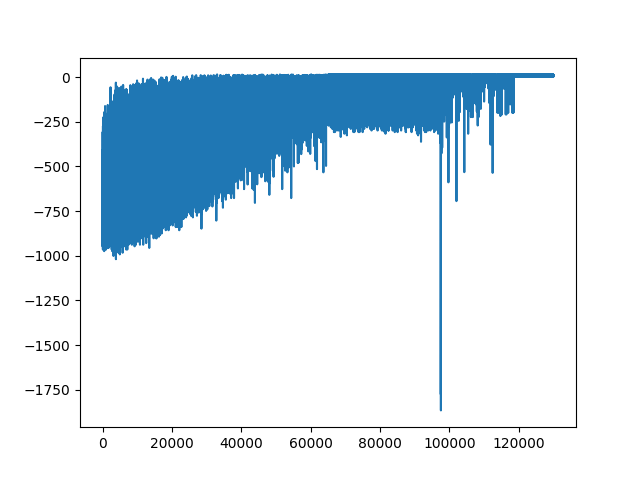

In [38]:
plt.plot(total_rewards_monte)
plt.show()

In [8]:
def SARSA(env, episode_n, gamma=0.9, trajectory_len=500, alpha=0.5):
    total_rewards = np.zeros(episode_n)
    episedes_total = np.zeros(episode_n+1)
    
    state_n = env.observation_space.n
    action_n = env.action_space.n
    qfunction = np.zeros((state_n, action_n))
    
    for episode in range(episode_n):
        epsilon = 1 / (episode + 1)
        
        state = env.reset()
        action = get_epsilon_greedy_action(qfunction[state], epsilon, action_n)
        for _ in range(trajectory_len):
            next_state, reward, done, _ = env.step(action)
            next_action = get_epsilon_greedy_action(qfunction[next_state], epsilon, action_n)
            
            qfunction[state][action] += alpha * (reward + gamma * qfunction[next_state][next_action] - qfunction[state][action])
            
            state = next_state
            action = next_action
            
            episedes_total[episode+1] += 1
            total_rewards[episode] += reward
            
            if done:
                break
                
        episedes_total[episode+1] += episedes_total[episode]

    return total_rewards, episedes_total[1:]

<IPython.core.display.Javascript object>


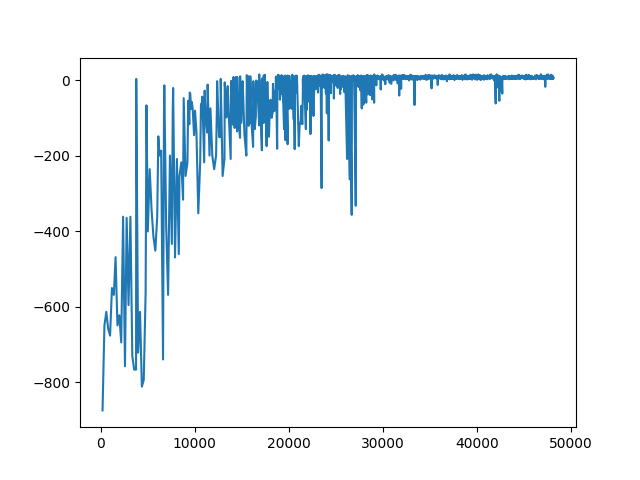

In [9]:
total_rewards_s,episedes_total_s = SARSA(env, episode_n=2000, trajectory_len=1000, gamma=0.99, alpha=0.8)

plt.plot(episedes_total_s,total_rewards_s)
plt.show()

In [10]:
def QLearning(env,episode_n, trajectory_len, noisy_episode_n, gamma=0.9, t_max=500, alpha=0.5):
    total_rewards = np.zeros(episode_n)
    episedes_total = np.zeros(episode_n+1)
    
    state_n = env.observation_space.n
    action_n = env.action_space.n
    qfunction = np.zeros((state_n, action_n))
    
    for episode in range(episode_n):
        epsilon = 1 / (episode + 1)
        if episode >= noisy_episode_n:
            epsilon = 0
        
        state = env.reset()
        action = get_epsilon_greedy_action(qfunction[state], epsilon, action_n)
        for _ in range(trajectory_len):
            next_state, reward, done, _ = env.step(action)
            max_q = max([qfunction[next_state][next_action] for next_action in range(action_n)])
            
            next_action = get_epsilon_greedy_action(qfunction[next_state], epsilon = 0, action_n = action_n)
            
            qfunction[state][action] += alpha * (reward + gamma * qfunction[next_state][next_action] - qfunction[state][action])
            
            next_action = get_epsilon_greedy_action(qfunction[next_state], epsilon, action_n)
            state = next_state
            action = next_action
            
            episedes_total[episode+1] += 1
            total_rewards[episode] += reward
            
            if done:
                break
                
        episedes_total[episode+1] += episedes_total[episode]

    return total_rewards, episedes_total[1:]

<IPython.core.display.Javascript object>


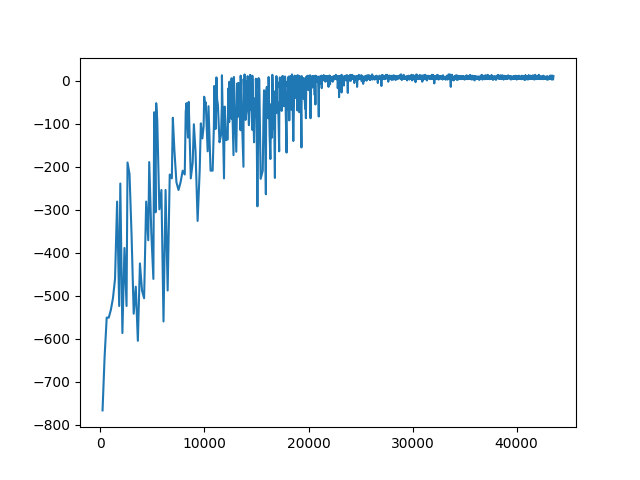

In [11]:
total_rewards_q,episedes_total_q  = QLearning(env, episode_n=2000, trajectory_len=1000, noisy_episode_n=700, t_max=1000, gamma=0.99, alpha=0.8)

plt.plot(episedes_total_q,total_rewards_q)
plt.show()

In [12]:
class CrossEntropyAgent():
    def __init__(self, state_n, action_n, model = None):
        self.state_n = state_n
        self.action_n = action_n
        if(model):
            self.model = model.copy
        else:
            self.model = np.ones((self.state_n, self.action_n)) / self.action_n

    def get_action(self, state, _model = None):
        model = self.model
        if(isinstance(_model,np.ndarray)):
            model = self.model
        action = np.random.choice(np.arange(self.action_n), p=model[state])
        return int(action)
    
    def sample_determ_model(self, model):
        res = np.zeros(model.shape)
        for state in range(model.shape[0]):
            action = np.random.choice(np.arange(model.shape[1]), p=model[state])
            res[state,action] = 1
        return res

    def fit(self, elite_trajectories, update_type = 'rewrite', update_coef = 0):
        new_model = np.zeros((self.state_n, self.action_n))
        for trajectory in elite_trajectories:
            for state, action in zip(trajectory['states'], trajectory['actions']):
                new_model[state][action] += 1

        for state in range(self.state_n):
            if np.sum(new_model[state]) > 0:
                if(update_type == 'Laplace'):
                    new_model[state] += update_coef
                    new_model[state] /= (np.sum(new_model[state]) + update_coef*action_n)
                else:
                    new_model[state] /= np.sum(new_model[state])
            else:
                new_model[state] = self.model[state].copy()
        if(update_type == 'rewrite' or update_type == 'Laplace'):
            self.model = new_model
        if(update_type == 'Policy'):
            self.model = self.model*update_coef + new_model*(1 - update_coef)
            
        return None


def get_state(obs):
    return obs


def get_trajectory(env, agent, model = None, max_len=1000, visualize=False):
    trajectory = {'states': [], 'actions': [], 'rewards': []}

    obs = env.reset()
    state = get_state(obs)

    for _ in range(max_len):
        trajectory['states'].append(state)
        
        action = agent.get_action(state, model)
        trajectory['actions'].append(action)
        
        obs, reward, done, _ = env.step(action)
        trajectory['rewards'].append(reward)
        
        state = get_state(obs)

        if visualize:
            time.sleep(0.5)
            env.render()

        if done:
            break
    
    return trajectory

def CEMethod(q_param, iteration_n, trajectory_n_per_realisation, samples_number):
    state_n = env.observation_space.n
    action_n = env.action_space.n
    agent = CrossEntropyAgent(state_n, action_n)
    hist = []
    episedes_total=np.zeros(iteration_n+1)
    
    for iteration in range(iteration_n):
    #policy evaluation
        trajectories = []
        for realisation in range(samples_number):
            model = agent.sample_determ_model(agent.model)
            trajectories_r = [get_trajectory(env, agent, model) for _ in range(trajectory_n_per_realisation)]
            trajectories.append(trajectories_r)
        total_rewards = []
        for realisation in trajectories:
            total_rewards.append(np.mean([np.sum(trajectory['rewards']) for trajectory in realisation]))
        print('iteration:', iteration, 'mean total reward:', np.mean(total_rewards))
        hist.append(np.mean(total_rewards))
        episedes_total[iteration+1] = (episedes_total[iteration] +\
                                       np.sum([np.sum([len(t['rewards']) for t in tr_r]) for tr_r in trajectories]))
        #policy improvement
        quantile = np.quantile(total_rewards, q_param)
        elite_trajectories = []
        for realisation in trajectories:
            total_reward = np.mean([np.sum(trajectory['rewards']) for trajectory in realisation])
            if total_reward > quantile:
                elite_trajectories.extend(realisation)
        print('rew = ',hist[-1], ';  episode = ', iteration,'/',iteration_n, sep='')
        agent.fit(elite_trajectories)
    return hist,episedes_total[1:]


iteration: 0 mean total reward: -773.996
rew = -773.996;  episode = 0/50
iteration: 1 mean total reward: -737.9760000000001
rew = -737.9760000000001;  episode = 1/50
iteration: 2 mean total reward: -684.8233333333334
rew = -684.8233333333334;  episode = 2/50
iteration: 3 mean total reward: -625.0346666666667
rew = -625.0346666666667;  episode = 3/50
iteration: 4 mean total reward: -557.0886666666667
rew = -557.0886666666667;  episode = 4/50
iteration: 5 mean total reward: -498.6586666666667
rew = -498.6586666666667;  episode = 5/50
iteration: 6 mean total reward: -431.3446666666666
rew = -431.3446666666666;  episode = 6/50
iteration: 7 mean total reward: -362.8586666666667
rew = -362.8586666666667;  episode = 7/50
iteration: 8 mean total reward: -286.40133333333335
rew = -286.40133333333335;  episode = 8/50
iteration: 9 mean total reward: -206.55
rew = -206.55;  episode = 9/50
iteration: 10 mean total reward: -151.4526666666667
rew = -151.4526666666667;  episode = 10/50
iteration: 11 m

<IPython.core.display.Javascript object>


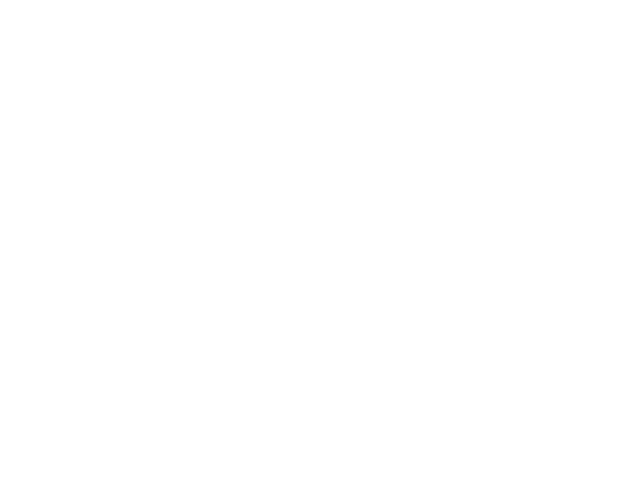

In [13]:
q_param = 0.7
iteration_n = 50
trajectory_n_per_realisation = 5
samples_number = 300

total_rewards,episedes_total = CEMethod(q_param,iteration_n,trajectory_n_per_realisation,samples_number)

<IPython.core.display.Javascript object>


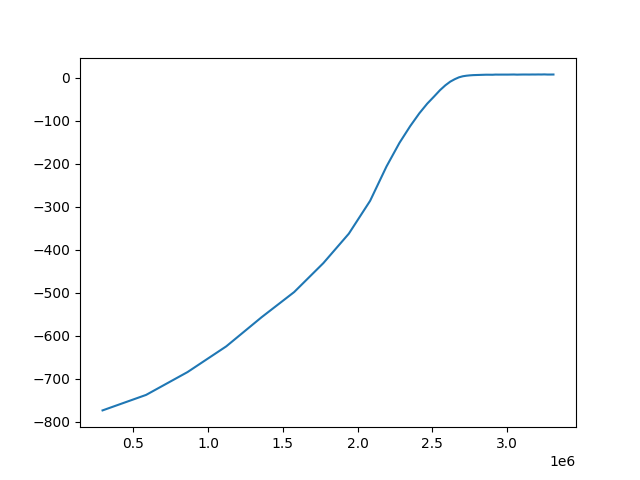

In [15]:
plt.plot(episedes_total,total_rewards)

<IPython.core.display.Javascript object>


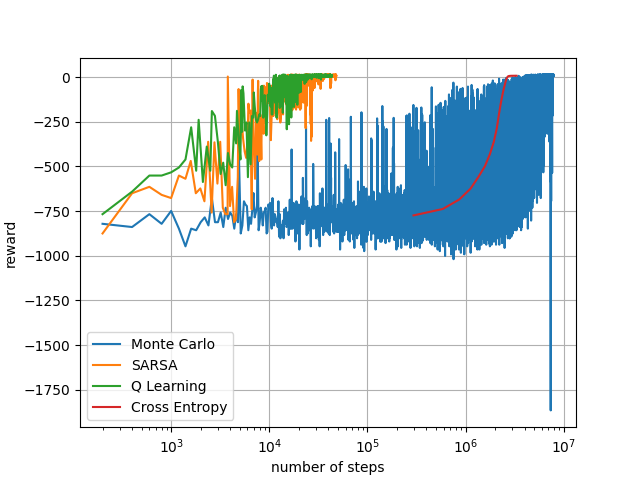

In [58]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(episodes_monte,total_rewards_monte,label='Monte Carlo')
ax.plot(episedes_total_s,total_rewards_s,label='SARSA')
ax.plot(episedes_total_q,total_rewards_q,label='Q Learning')
ax.plot(episedes_total,total_rewards,label='Cross Entropy')
ax.legend()
ax.set_ylabel('reward')
ax.set_xlabel('number of steps')
ax.grid(True)
ax.set_xscale('log')

In [59]:
plt.savefig('fig4_1.png',dpi=300,bbox_inches='tight',facecolor='white')